# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import openweather api
import openweathermapy.core as owm

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [46]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations. original 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

145

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [47]:
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}
#Unit Default: Kelvin, Metric: Celsius, Imperial: Fahrenheit.
city_name = []          
cloudiness = []   
country = []       
date = []          
humidity = []      
lat = []           
lng = []           
max_temp = []     
wind_speed = []

# iteration counter
i = 0
# set counter
set_no = 1

# openweatherapi free account allow 60 api queries per minute. Set the maximum number to 58 to be saft
query_per_min = 58
query_no = 1

print('Beginning Data Retrieval \n -----------------------------')
for city in cities:
    
#    for i in range(query_per_min):   
    try:
        
        # Get data from the API
        current_weather = owm.get_current(city, **settings)
        summary = ["name", "clouds.all", "sys.country", "dt", "main.humidity", "main.temp_max", "coord.lat", "coord.lon", "wind.speed"]
        data = current_weather(*summary)
        
        # Print Status
        print(f'Processing Record {i+1} of Set {set_no} | {data[0]}')
        
        # Store in lists
        city_name.append(data[0])          
        cloudiness.append(data[1])
        country.append(data[2])  
        date.append(data[3])     
        humidity.append(data[4])
        max_temp.append(data[5])
        lat.append(data[6])    
        lng.append(data[7])
        wind_speed.append(data[8])
            
        # Increase counters
        i = i+1
        query_no = query_no + 1
        
    except: 
        print(f'City not found. Skipping...')
        query_no = query_no + 1

    # Start next set
    if query_no == query_per_min:
        
         # counter reset
        i = 0
        query_no = 0
        
        # Increase set counter
        set_no = set_no +1
        
        # Sleep for 60 seconds after each set
        time.sleep(60)
    
print('----------------------------- \n Data Retrieval Complete \n -----------------------------')
#data

Beginning Data Retrieval 
 -----------------------------
Processing Record 1 of Set 1 | Jamestown
Processing Record 2 of Set 1 | Atuona
Processing Record 3 of Set 1 | Puerto Ayora
Processing Record 4 of Set 1 | Kranea Elassonos
Processing Record 5 of Set 1 | Manoel Urbano
Processing Record 6 of Set 1 | Kijang
Processing Record 7 of Set 1 | Claremore
Processing Record 8 of Set 1 | Vardo
Processing Record 9 of Set 1 | Rikitea
Processing Record 10 of Set 1 | Klaksvik
Processing Record 11 of Set 1 | Georgetown
Processing Record 12 of Set 1 | Saint-Philippe
Processing Record 13 of Set 1 | Albany
Processing Record 14 of Set 1 | Jalu
Processing Record 15 of Set 1 | Kabanjahe
Processing Record 16 of Set 1 | Esperance
Processing Record 17 of Set 1 | Myaundzha
Processing Record 18 of Set 1 | Mataura
City not found. Skipping...
Processing Record 19 of Set 1 | Yellowknife
Processing Record 20 of Set 1 | New Norfolk
Processing Record 21 of Set 1 | Janakkala
City not found. Skipping...
Processing Re

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
# Create data frame
weather_df = pd.DataFrame({"City": city_name, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity,
                           "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed})

# Clean up
weather_df = weather_df.dropna(how='any')

# How row count
weather_df.count()

City          133
Cloudiness    133
Country       133
Date          133
Humidity      133
Lat           133
Lng           133
Max Temp      133
Wind Speed    133
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [49]:
weather_df.to_csv("Output/weather_data.csv", encoding="utf-8", index=False, header=True)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,0,AU,1547266726,44,-33.21,138.60,88.00,11.77
1,Atuona,0,PF,1547265040,100,-9.80,-139.03,81.47,16.24
2,Puerto Ayora,48,EC,1547266811,100,-0.74,-90.35,76.39,9.19
3,Kranea Elassonos,90,GR,1547261400,93,39.95,21.97,37.40,4.70
4,Manoel Urbano,12,BR,1547266950,94,-8.84,-69.26,74.95,2.04


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [50]:
# Get today's date to put in plot titles
now = datetime.datetime.now()
today = now.strftime("%m/%d/%Y")

# Define plot parameters to use in all plot
size = 40
marker_shape = "o" 
color = "#3C577F"
edge_color = "black"
line_width = 1
alpha_value = 0.8

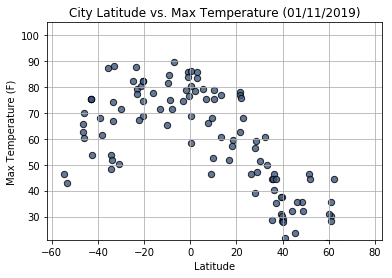

In [51]:
# Defind axes
x_lat = weather_df['Lat']
y_max_temp = weather_df['Max Temp']

# Build the scatter plots for each city types
plt.scatter(x_lat, y_max_temp, s=size, marker=marker_shape, facecolors=color, edgecolors=edge_color, linewidth=line_width, alpha=alpha_value)

# Incorporate the other graph properties
plt.xlim(-62, 83)
plt.ylim(21, 105)
plt.grid()
plt.title(f'City Latitude vs. Max Temperature ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save Figure
plt.savefig("images/Lat_vs_MaxTemp_Plot.png", bbox_inches="tight")

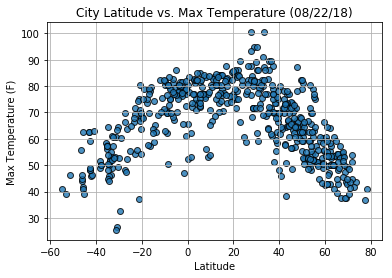

#### Latitude vs. Humidity Plot

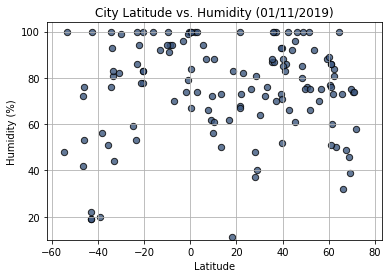

In [52]:
# Defind axes
x_lat = weather_df['Lat']
y_humidity = weather_df['Humidity']

# Build the scatter plots for each city types
plt.scatter(x_lat, y_humidity, s=size, marker=marker_shape, facecolors=color, edgecolors=edge_color, linewidth=line_width, alpha=alpha_value)

# Incorporate the other graph properties
plt.xlim(-62, 83)
plt.ylim(10, 104)
plt.grid()
plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save Figure
plt.savefig("images/Lat_vs_Humidity_Plot.png", bbox_inches="tight")

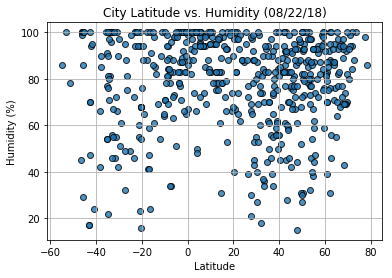

#### Latitude vs. Cloudiness Plot

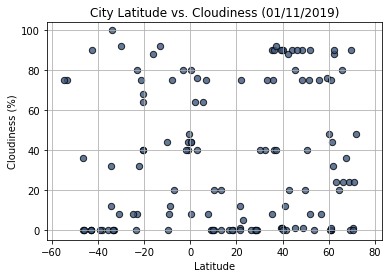

In [53]:
# Defind axes
x_lat = weather_df['Lat']
y_cloudiness = weather_df['Cloudiness']

# Build the scatter plots for each city types
plt.scatter(x_lat, y_cloudiness, s=size, marker=marker_shape, facecolors=color, edgecolors=edge_color, linewidth=line_width, alpha=alpha_value)

# Incorporate the other graph properties
plt.xlim(-62, 83)
plt.ylim(-5, 104)
plt.grid()
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save Figure
plt.savefig("images/Lat_vs_Cloudiness_Plot.png", bbox_inches="tight")

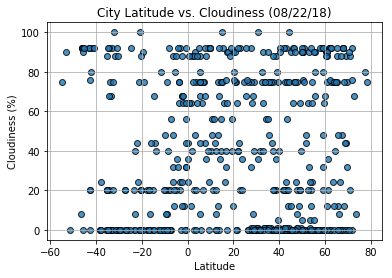

#### Latitude vs. Wind Speed Plot

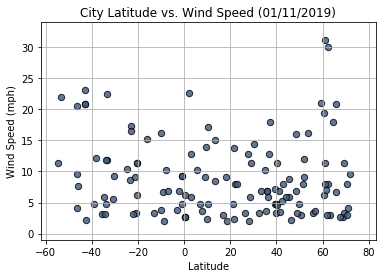

In [54]:
# Defind axes
x_lat = weather_df['Lat']
y_wind = weather_df['Wind Speed']

# Build the scatter plots for each city types
plt.scatter(x_lat, y_wind, s=size, marker=marker_shape, facecolors=color, edgecolors=edge_color, linewidth=line_width, alpha=alpha_value)

# Incorporate the other graph properties
plt.xlim(-62, 83)
plt.ylim(-1, 34)
plt.grid()
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save Figure
plt.savefig("images/Lat_vs_Wind_Speed_Plot.png", bbox_inches="tight")

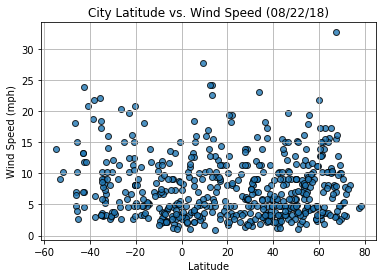